In [11]:
import numpy as np, json
import os.path as osp
from phc import module_reload
module_reload('zhh')
import matplotlib.pyplot as plt
from zhh import get_runtime_analysis, evaluate_runtime, get_adjusted_time_per_event, get_sample_chunk_splits, get_process_normalization
from typing import Optional
from math import floor, ceil
from glob import glob

version = 'v1'
REPO_ROOT = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/ZHH'
ILD_VERSION = 'ILD_l5_o1_v02'
PROD_NAME = '500-TDR_ws'

with open(f'{REPO_ROOT}/workflows/analysis/custom_statistics.json') as f:
    custom_statistics = json.load(f)

DATA_ROOT = f'/nfs/dust/ilc/user/bliewert/zhh'
PROCESS_INDEX = f'{DATA_ROOT}/CreateRawIndex/v1/processes.npy'
SAMPLE_INDEX = f'{DATA_ROOT}/CreateRawIndex/v1/samples.npy'

processes = np.load(PROCESS_INDEX)
samples = np.load(SAMPLE_INDEX)

Runtime analysis

In [16]:
module_reload('zhh')
from zhh import get_runtime_analysis, evaluate_runtime, get_adjusted_time_per_event, get_sample_chunk_splits, get_process_normalization

DR = f'{DATA_ROOT}/PreselectionRuntime/v1/'
pn = get_process_normalization(processes, samples, RATIO_BY_EXPECT=1.)
ra = get_runtime_analysis(DATA_ROOT=DR)
atpe = get_adjusted_time_per_event(ra)
scs = get_sample_chunk_splits(samples, atpe, pn, custom_statistics=custom_statistics, MAXIMUM_TIME_PER_JOB=7200)

In [21]:
for process in np.unique(samples['process']):
    n_tot = samples['n_events'][samples['process'] == process].sum()
    n_use = scs['chunk_size'][scs['process'] == process].sum()
    
    print(f'{process}: {n_use} / {n_tot} = {n_use / n_tot :.2%}')

2f_z_bhabhag: 681482 / 681482 = 100.00%
2f_z_bhabhang: 11961800 / 11961800 = 100.00%
2f_z_h: 2351667 / 2351667 = 100.00%
2f_z_l: 660806 / 715583 = 92.35%
2f_z_nung: 16473530 / 17467466 = 94.31%
4f_lowmee_sze_l: 3221 / 4852 = 66.38%
4f_lowmee_szeorsw_l: 31988 / 32969 = 97.02%
4f_sw_l: 1380000 / 1476839 = 93.44%
4f_sw_sl: 432359 / 442174 = 97.78%
4f_sze_l: 4184433 / 5395817 = 77.55%
4f_sze_sl: 406561 / 406561 = 100.00%
4f_szeorsw_l: 606214 / 676521 = 89.61%
4f_sznu_l: 140439 / 146824 = 95.65%
4f_sznu_sl: 76200 / 101563 = 75.03%
4f_ww_h: 378353 / 392767 = 96.33%
4f_ww_l: 151820 / 153613 = 98.83%
4f_ww_sl: 480312 / 499910 = 96.08%
4f_zz_h: 57553 / 58219 = 98.86%
4f_zz_l: 31590 / 46427 = 68.04%
4f_zz_sl: 324471 / 444373 = 73.02%
4f_zzorww_h: 318511 / 333757 = 95.43%
4f_zzorww_l: 410042 / 418221 = 98.04%
e1e1hh: 1700 / 953154 = 0.18%
e1e1qqh: 10500 / 620173 = 1.69%
e2e2hh: 1500 / 475696 = 0.32%
e2e2qqh: 10000 / 334194 = 2.99%
e3e3hh: 1500 / 462214 = 0.32%
e3e3qqh: 10000 / 319096 = 3.13%
eeee

In [18]:
len(scs)

4404

In [29]:
sorted_atpe = atpe[np.argsort(-atpe['tPE'])][:12]
sorted_atpe

array([('qqhh', 521.5    , 300, 10.43     ),
       ('yyyyyy', 411.25   , 200,  8.225    ),
       ('e1e1hh', 383.58334, 600,  7.6716666),
       ('yyxylv', 354.16666, 300,  7.0833335),
       ('n1n1hh', 312.5    , 300,  6.25     ),
       ('yycyyc', 292.5    , 300,  5.85     ),
       ('yyxyev', 286.875  , 400,  5.7375   ),
       ('yyvlyx', 283.16666, 300,  5.6633334),
       ('yyveyx', 274.     , 400,  5.48     ),
       ('yyuyyu', 259.     , 300,  5.18     ),
       ('yyvllv', 255.5    , 300,  5.11     ),
       ('yycyyu', 254.16667, 300,  5.0833335)],
      dtype=[('process', '<U64'), ('tAvg', '<f4'), ('n_processed', '<i4'), ('tPE', '<f4')])

Text(0, 0.5, 'time per event [s]')

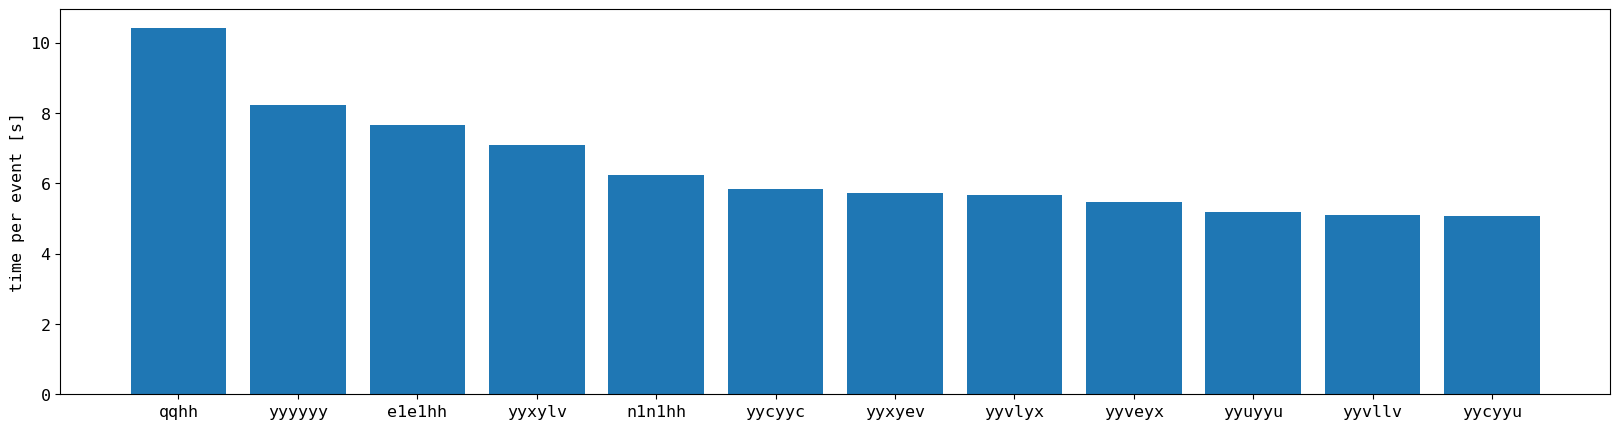

In [30]:
fig, ax = plt.subplots(figsize=(20, 5)) 
ax.bar(sorted_atpe['process'], sorted_atpe['tPE'])
ax.set_ylabel('time per event [s]')